## Car Price Prediction

In [216]:
# Importing important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Understanding the Data

In [217]:
# Importing file

df = pd.read_csv('CarPrice_Assignment.csv')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)
df.head(20)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


#### Checking Data Structure

In [218]:
# Checking shape of dataset

df.shape

(205, 26)

In [219]:
# Checking column type and value count of dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [220]:
# checking numerical aspects of df

df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [221]:
# Checking of missing values

df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

##### Dataset contains no missing values.

In [222]:
# extracting car company name from column 'CarName'

df['company'] = df['CarName'].apply(lambda x: x.split(' ')[0])
df.head(20)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000,audi
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000,audi
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000,audi
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000,audi
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000,audi
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167,audi


In [223]:
# Dropping not required column 'CarName'
df = df.drop(['CarName','car_ID'], axis = 1)

In [224]:
# Performing univariate analysis

f = df.select_dtypes(exclude = 'object')

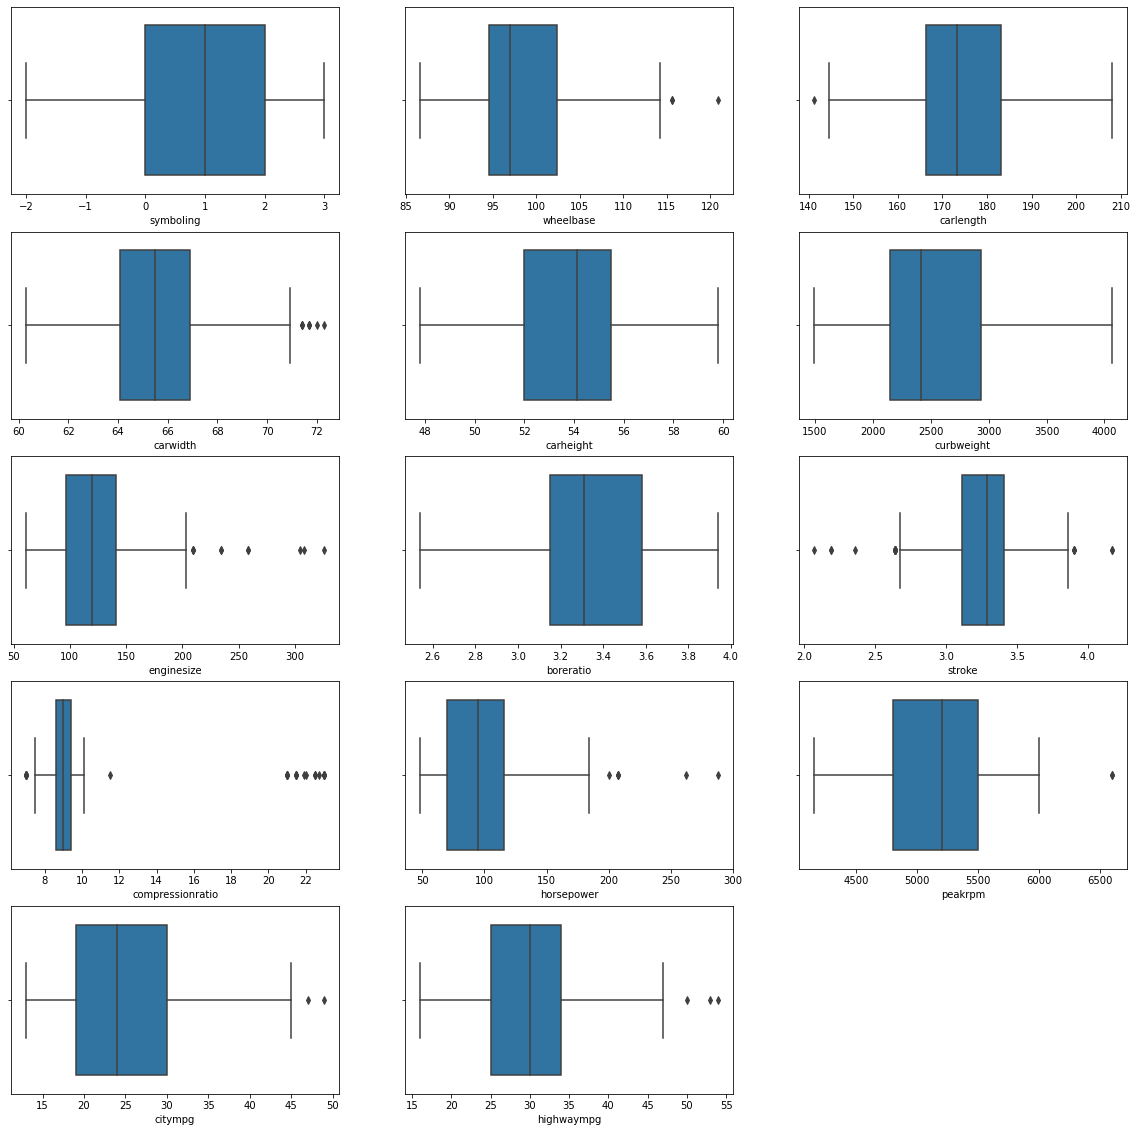

In [225]:
# Plotting boxplot for numerical columns

plt.figure(figsize=(20,20))
f = f.columns[:-1]
for i in enumerate(f):
    plt.subplot(5,3,i[0]+1)
    sns.boxplot(df[i[-1]])

In [226]:
# Checking qunatiles of numberical columns

df.quantile([0.5,0.75,0.9,0.95,0.99])

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0.50,1.0,97.000,173.20,65.50,54.10,2414.0,120.00,3.310,3.29,9.00,95.0,5200.0,24.00,30.00,10295.00
0.75,2.0,102.400,183.10,66.90,55.50,2935.0,141.00,3.580,3.41,9.40,116.0,5500.0,30.00,34.00,16503.00
0.90,3.0,107.900,188.80,68.64,56.62,3230.0,181.00,3.672,3.54,10.94,160.0,5780.0,31.60,38.00,22563.00
0.95,3.0,110.000,196.36,70.46,57.50,3503.0,201.20,3.780,3.64,21.82,180.8,5980.0,37.00,42.80,32472.40
0.99,3.0,115.544,202.48,71.70,59.10,3948.0,302.16,3.800,3.90,23.00,207.0,6000.0,44.72,49.88,40802.72


In [227]:
# Performing soft capping on quantile 0.99 percentile on columns- 
# 'curbweight', 'enginesize', 'stroke', 'compressionratio', 'horsepower'

q1 = df['curbweight'].quantile(0.99)
df = df[df['curbweight'] < q1]

q2 = df['enginesize'].quantile(0.99)
df = df[df['enginesize'] < q2]

q3 = df['stroke'].quantile(0.99)
df = df[df['stroke'] < q3]

q4 = df['stroke'].quantile(0.01)
df = df[df['stroke'] > q4]

q5 = df['compressionratio'].quantile(0.99)
df = df[df['compressionratio'] < q5]

q6 = df['horsepower'].quantile(0.99)
df = df[df['horsepower'] < q6] 

In [228]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,0.792350,98.330055,172.834973,65.645355,53.728962,2489.256831,120.191257,3.317432,3.259016,9.917596,99.300546,5138.524590,25.710383,31.240437,11946.951732
std,1.218243,5.384167,11.758587,1.938723,2.418196,467.641833,29.666119,0.257664,0.263624,3.581440,31.940232,478.469984,6.208666,6.417447,6074.300027
min,-2.000000,86.600000,141.100000,60.300000,48.800000,1488.000000,61.000000,2.680000,2.360000,7.000000,48.000000,4150.000000,15.000000,20.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.000000,52.000000,2121.000000,97.000000,3.150000,3.150000,8.600000,70.000000,4800.000000,21.000000,25.000000,7609.000000
50%,1.000000,96.500000,172.400000,65.400000,54.100000,2395.000000,110.000000,3.310000,3.290000,9.000000,94.000000,5200.000000,25.000000,31.000000,9980.000000
75%,2.000000,101.200000,178.300000,66.500000,55.500000,2845.500000,140.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,36.000000,15667.500000
max,3.000000,115.600000,202.600000,71.700000,59.800000,3770.000000,209.000000,3.940000,3.860000,22.700000,200.000000,6600.000000,49.000000,54.000000,41315.000000


### Checking correlation between variables
1. Pairplot
2. Heatmap

In [ ]:
# Plottiong Pairplot
plt.figure(figsize = (20,20))
sns.pairplot(df)
plt.show()

<Figure size 1440x1440 with 0 Axes>

In [ ]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, cmap = 'Greens')
plt.show()

Inferences:
- We have high correlation of variables 'Curbweight' and 'enginesize' as 0.84 & 0.8 with target variable 'price'

In [ ]:
# Performing bi-variate analysis with target variable 'price'

# Curbweight Vs. price

plt.figure(figsize = (10,5))
sns.scatterplot(x= 'curbweight', y = df.price, data = df,color = 'cyan', edgecolor = 'Black')
plt.title("Curbweight Vs. price", fontdict = {'fontsize': 20, 'fontweight' : 10, 'color' : 'Green'})
plt.xlabel('Curbweight', fontdict = {'fontsize' : 15, 'fontweight' : 5, 'color' :  'Blue'})
plt.ylabel('Price', fontdict = {'fontsize' : 15, 'fontweight': 5, 'color' : 'Blue'})

plt.show()

In [ ]:
# enginesize Vs. price

plt.figure(figsize = (10,5))
sns.scatterplot(x= 'enginesize', y = df.price, data = df,color = 'cyan', edgecolor = 'Black')
plt.title("enginesize Vs. price", fontdict = {'fontsize': 20, 'fontweight' : 10, 'color' : 'Green'})
plt.xlabel('enginesize', fontdict = {'fontsize' : 15, 'fontweight' : 5, 'color' :  'Blue'})
plt.ylabel('Price', fontdict = {'fontsize' : 15, 'fontweight': 5, 'color' : 'Blue'})


plt.show()

In [ ]:
# carwidth Vs. price

plt.figure(figsize = (10,5))
sns.scatterplot(x= 'carwidth', y = df.price, data = df,color = 'cyan', edgecolor = 'Black')
plt.title("carwidth Vs. price", fontdict = {'fontsize': 20, 'fontweight' : 10, 'color' : 'Green'})
plt.xlabel('carwidth', fontdict = {'fontsize' : 15, 'fontweight' : 5, 'color' :  'Blue'})
plt.ylabel('Price', fontdict = {'fontsize' : 15, 'fontweight': 5, 'color' : 'Blue'})


plt.show()

In [ ]:
# carheight Vs. price

plt.figure(figsize = (10,5))
sns.scatterplot(x= 'carheight', y = df.price, data = df,color = 'cyan', edgecolor = 'Black')
plt.title("carheight Vs. price", fontdict = {'fontsize': 20, 'fontweight' : 10, 'color' : 'Green'})
plt.xlabel('carheight', fontdict = {'fontsize' : 15, 'fontweight' : 5, 'color' :  'Blue'})
plt.ylabel('Price', fontdict = {'fontsize' : 15, 'fontweight': 5, 'color' : 'Blue'})

plt.show()

In [ ]:
# curbweight Vs. price

plt.figure(figsize = (10,5))
sns.scatterplot(x= 'curbweight', y = df.price, data = df,color = 'cyan', edgecolor = 'Black')
plt.title("curbweight Vs. price", fontdict = {'fontsize': 20, 'fontweight' : 10, 'color' : 'Green'})
plt.xlabel('curbweight', fontdict = {'fontsize' : 15, 'fontweight' : 5, 'color' :  'Blue'})
plt.ylabel('Price', fontdict = {'fontsize' : 15, 'fontweight': 5, 'color' : 'Blue'})


plt.show()

In [ ]:
df.head()

### OneHotEncoding

In [ ]:
X = df.loc[:, ['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','wheelbase',
           'carlength','carwidth','carheight','curbweight','enginetype','cylindernumber','enginesize','fuelsystem',
          'boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','company']]

y = df['price']

In [ ]:
df_cate = X.select_dtypes(include = ['object'])
df_cate.head()

In [ ]:
df_dummies = pd.get_dummies(df_cate, drop_first = True)
df_dummies.head()

In [ ]:
X = X.drop(list(df_cate.columns), axis = 1)
X.head()

In [ ]:
X = pd.concat([X, df_dummies], axis= 1)
print(X.shape)
X.head()

### Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.85, random_state = 42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
y_pred = lr.predict(X_train)

In [ ]:
print(f'LR train {metrics.r2_score(y_pred, y_train)}')

In [ ]:
y_pred_test = lr.predict(X_test)
print(f'LR test {metrics.r2_score(y_pred_test, y_test)}')

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt = DecisionTreeRegressor()

In [ ]:
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_train)

In [ ]:
print(f'DT train {metrics.r2_score(y_pred_dt, y_train)}')

In [ ]:
y_pred_test_dt = dt.predict(X_test)
print(f'LR test {metrics.r2_score(y_pred_test_dt, y_test)}')

In [ ]:
import pickle

In [ ]:
pickle_out = open('lr.pkl','wb')

pickle.dump(lr, pickle_out)

pickle_out.close()
